In [6]:
import soundfile as sf
import pydub
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
filepath = '/Users/dryoon04/Documents/GitHub/university-project/5audio image processing/file/ISEGYE IDOL-SuperHero.mp3'


In [8]:
data, samplerate = sf.read(filepath)
print(data.shape, samplerate)
print("duration: ", len(data)/samplerate, "seconds")

(7856128, 2) 44100
duration:  178.14349206349206 seconds


In [9]:
audio = pydub.AudioSegment.from_file(filepath, format="mp3")
# play(audio)

2d 음파 그래프

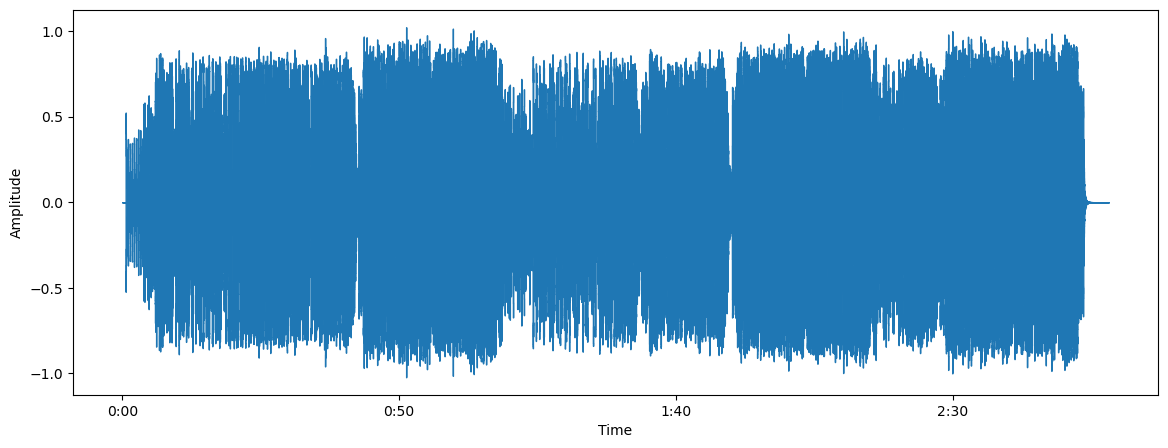

In [11]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.ylabel('Amplitude')
plt.show()

푸리에 변환

(1025, 5567)


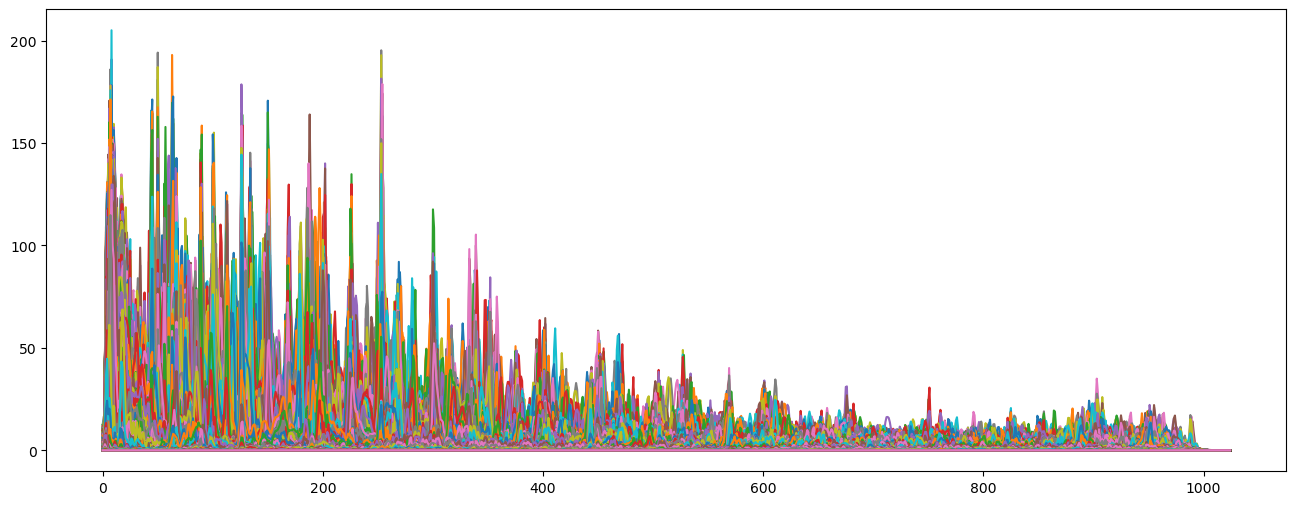

In [12]:
D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
print(D.shape)
plt.figure(figsize=(16, 6))
plt.plot(D)
plt.show()

spectogram

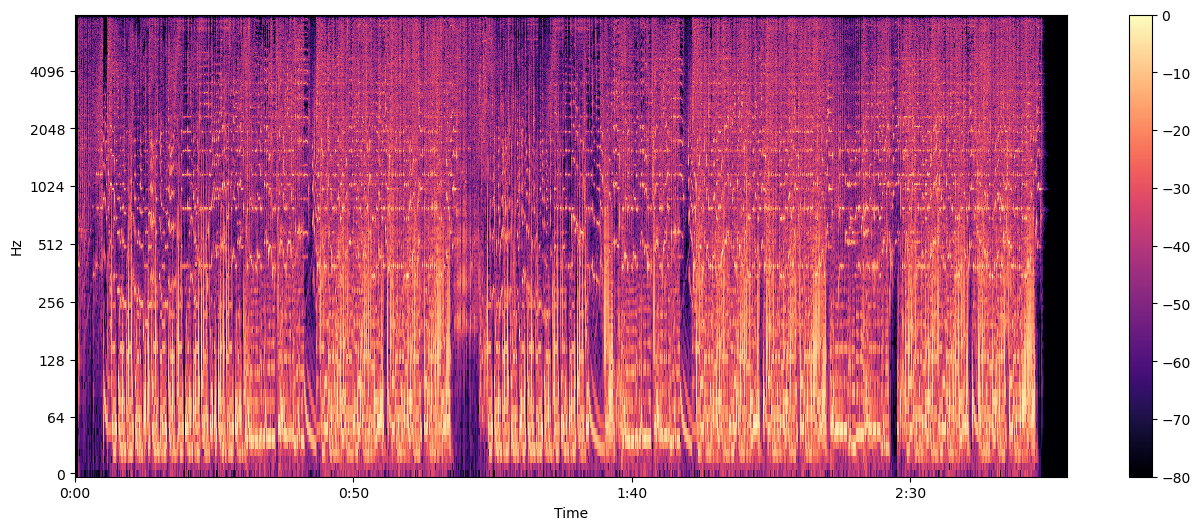

In [13]:
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

mel spectgram

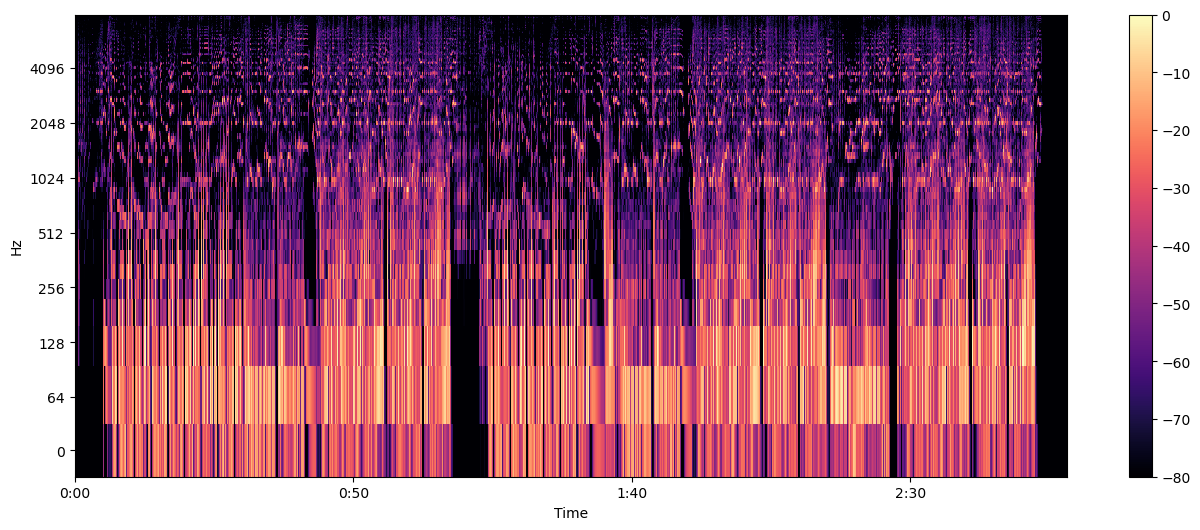

In [14]:
s = librosa.feature.melspectrogram(y=y, sr=sr)
s_DB = librosa.amplitude_to_db(s, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(s_DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [16]:
import librosa
import soundfile as sf

def downsample_audio(input_file, output_file, target_sr):
    # 오디오 파일을 librosa로 로드합니다.
    y, sr = librosa.load(input_file, sr=target_sr)

    # 다운샘플링된 오디오를 저장합니다.
    sf.write(output_file, y, target_sr)

    print(f"다운샘플링이 완료되었습니다. 샘플링 속도: {target_sr}, 저장된 파일: {output_file}")

# 사용 예시
input_file = '/Users/dryoon04/Documents/GitHub/university-project/5. audio image processing/file/ISEGYE IDOL-SuperHero.mp3'  # 입력 오디오 파일 경로
output_file = 'down.mp3'  # 다운샘플링된 오디오를 저장할 파일 경로
target_sr = 8000  # 목표 샘플링 속도

downsample_audio(input_file, output_file, target_sr)


다운샘플링이 완료되었습니다. 샘플링 속도: 8000, 저장된 파일: down.mp3


findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Font family 'NanumSquareRound' not found.
findfont: Fo

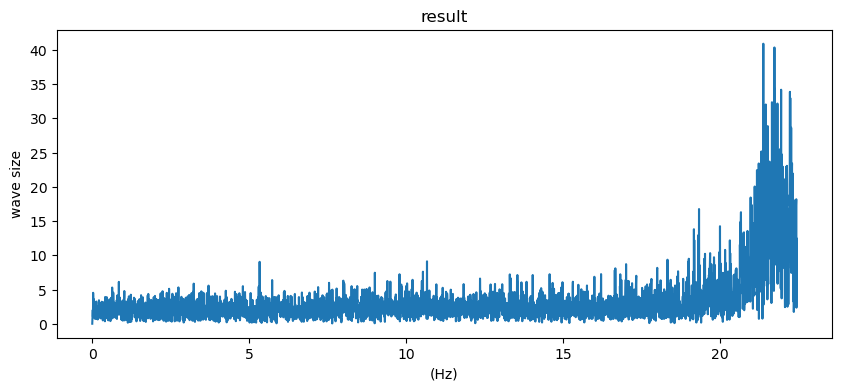

In [19]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 현재 작업 폴더에 있는 나눔고딕 폰트 파일의 경로를 지정
font_path = "/Users/dryoon04/Documents/GitHub/university-project/5. audio image processing/file/NanumSquareRoundB.ttf"  # 나눔고딕 폰트 파일의 이름과 확장자에 맞게 변경해주세요

# 나눔고딕 폰트 등록
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 나머지 코드는 이전과 동일하게 유지됩니다

# MP3 파일 경로 설정
mp3_file_path = "/Users/dryoon04/Documents/GitHub/university-project/5. audio image processing/file/ISEGYE IDOL-SuperHero.mp3"

# MP3 파일을 WAV 파일로 변환 (MP3 파일을 직접 처리하기 위해 pydub 라이브러리 사용 가능)
from pydub import AudioSegment
audio = AudioSegment.from_mp3(mp3_file_path)
audio.export("output.wav", format="wav")

# WAV 파일 읽기
sample_rate, audio_data = wavfile.read("output.wav")

# 스테레오 오디오의 경우 왼쪽 채널만 선택
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]

# 푸리에 변환
n = len(audio_data)  # 신호의 길이
k = np.arange(n)
T = n / sample_rate  # 주파수 샘플링 간격
frq = k / T  # 주파수 범위 (0부터 sample_rate까지)

Y = np.fft.fft(audio_data) / n  # 푸리에 변환 및 정규화
Y = Y[:n // 2]  # 절반까지만 선택 (대칭성 때문)

# 결과를 시각화
plt.figure(figsize=(10, 4))
plt.plot(frq[:4000], np.abs(Y[:4000]))  # 주파수 범위를 제한하여 플롯
plt.xlabel('(Hz)')
plt.ylabel('wave size')
plt.title('result')
plt.show()


In [23]:
from pydub import AudioSegment

def cut_audio(input_file, output_file, start_ms, end_ms):
    # 음성 파일 로드
    audio = AudioSegment.from_file(input_file, format="mp3")  # "your_audio_format"를 실제 오디오 파일 포맷으로 대체해야 합니다 (예: "mp3", "wav" 등)

    # 잘라낼 부분 선택
    start_time = start_ms  # 시작 시간 (밀리초)
    end_time = end_ms  # 종료 시간 (밀리초)

    # 음성 파일 자르기
    cut_audio = audio[start_time:end_time]

    # 자른 음성 파일 저장
    cut_audio.export(output_file, format="mp3")  # "your_audio_format"을 실제 오디오 파일 포맷으로 대체해야 합니다 (예: "mp3", "wav" 등)

# 사용 예시
input_file = "/Users/dryoon04/Documents/GitHub/university-project/5. audio image processing/file/ISEGYE IDOL-SuperHero.mp3"  # 입력 음성 파일 경로
output_file = "output_audio.mp3"  # 자른 음성 파일 저장 경로
start_ms = 10000  # 시작 시간 (밀리초)
end_ms = 20000  # 종료 시간 (밀리초)

cut_audio(input_file, output_file, start_ms, end_ms)
